In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob

In [12]:
def importer(filename):
    data = pd.read_csv(filename, sep = "\t")
    
    #print(data.keys())
    
    time = data["time"]
    Susceptable = data['susceptible (total) median']
    Exposed = data['exposed (total) median']
    Infected = data['infectious (total) median']
    Recovered = np.array(data['cumulative recovered (total) median'])
    
    samples = len(time)
    recovered = [0]
    for i in range(0,samples-1):
        recovered.append(Recovered[i+1]-Recovered[i])
    
    return time, Susceptable, Exposed, Infected, recovered

['Test1\\test1.tsv', 'Test1\\test2.tsv']


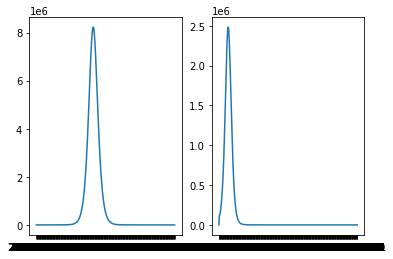

In [20]:
def datacollector():
    ttime = []
    tsus = []
    texp = []
    tinf = []
    trec = []
    
    files = glob.glob("Test1/*.tsv")
    print(files)
    for filename in files:
        time, susceptable, exposed, infected, recovered = importer(filename)
        ttime.append(time)
        tsus.append(susceptable)
        texp.append(exposed)
        tinf.append(infected)
        trec.append(recovered)
        
    fig, ax = plt.subplots(1,2)
    ax[0].plot(ttime[0], trec[0])
    ax[1].plot(ttime[1],trec[1])
    
datacollector()